In [1]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pickle as pk
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 12 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

<Figure size 1200x900 with 0 Axes>

In [3]:
KeySeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeySeriesAVGdict.pk', 'rb'))
FirstSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstSeriesAVGdict.pk', 'rb'))
LastSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastSeriesAVGdict.pk', 'rb'))

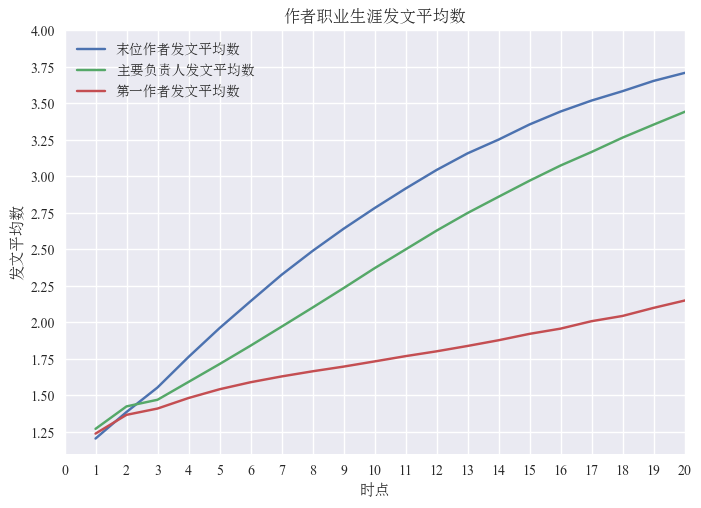

In [35]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,Last, label='末位作者发文平均数')
ax.plot(years1,Key, label='主要负责人发文平均数')
ax.plot(years2,First, label='第一作者发文平均数')
ax.set(xlabel='时点', ylabel='发文平均数',
       title='作者职业生涯发文平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0, 20)
ax.set_ylim(1.1, 4)
ax.set_xticks([i for i in range(0,21,1)])
ax.set_yticks(np.array([i for i in range(125,410,25)])/100)
ax.legend()
fig.savefig("作者职业生涯发文平均数.png",dpi=300)
plt.show()

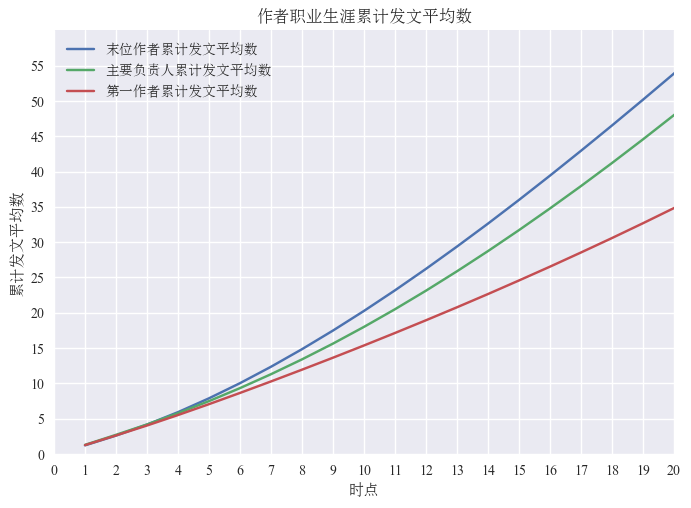

In [41]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.cumsum(Last), label='末位作者累计发文平均数')
ax.plot(years1,np.cumsum(Key), label='主要负责人累计发文平均数')
ax.plot(years2,np.cumsum(First), label='第一作者累计发文平均数')
ax.set(xlabel='时点', ylabel='累计发文平均数',
       title='作者职业生涯累计发文平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0, 20)
ax.set_ylim(1.1, 60)
ax.set_xticks([i for i in range(0,21,1)])
ax.set_yticks(np.array([i for i in range(0,56,5)]))
ax.legend()
fig.savefig("作者职业生涯累计发文平均数.png",dpi=300)
plt.show()

In [15]:
KeyJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJournalSeriesAVGdict.pk', 'rb'))
FirstJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJournalSeriesAVGdict.pk', 'rb'))
LastJSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJournalSeriesAVGdict.pk', 'rb'))

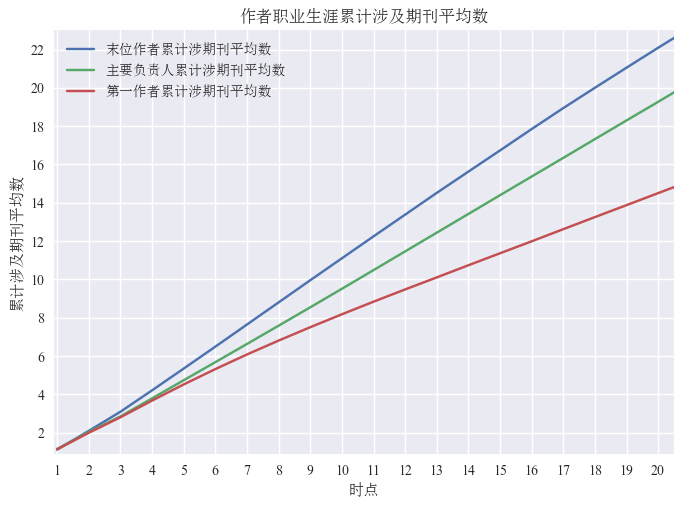

In [30]:
years1 , Key = zip(*sorted(KeyJSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,Last, label='末位作者累计涉期刊平均数')
ax.plot(years1,Key, label='主要负责人累计涉期刊平均数')
ax.plot(years2,First, label='第一作者累计涉期刊平均数')
ax.set(xlabel='时点', ylabel='累计涉及期刊平均数',
       title='作者职业生涯累计涉及期刊平均数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 23)
ax.set_xticks([i for i in range(1,21,1)])
ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计涉及期刊平均数.png",dpi=300)
plt.show()

# 累计发文/累计期刊数

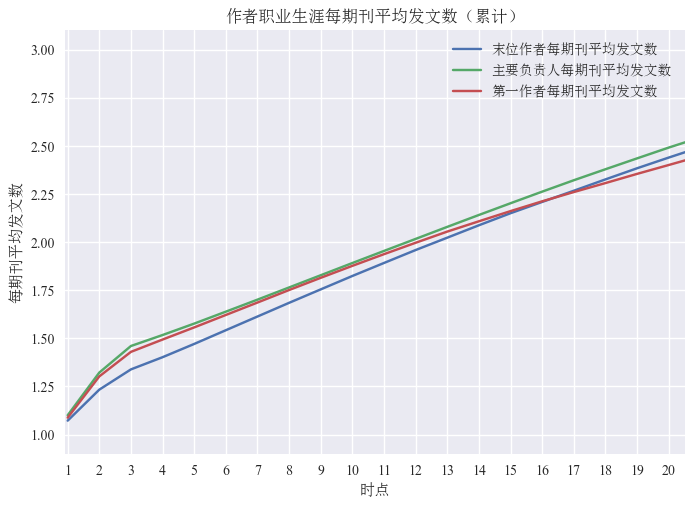

In [45]:
years1 , Key = zip(*sorted(KeySeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastSeriesAVGdict.items()))
years1 , KeyJ = zip(*sorted(KeyJSeriesAVGdict.items()))
years2 , FirstJ = zip(*sorted(FirstJSeriesAVGdict.items()))
years3 , LastJ = zip(*sorted(LastJSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.cumsum(Last)/np.array(LastJ), label='末位作者每期刊平均发文数')
ax.plot(years1,np.cumsum(Key)/np.array(KeyJ), label='主要负责人每期刊平均发文数')
ax.plot(years2,np.cumsum(First)/np.array(FirstJ), label='第一作者每期刊平均发文数')
ax.set(xlabel='时点', ylabel='每期刊平均发文数',
       title='作者职业生涯每期刊平均发文数（累计）')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 3.1)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯每期刊平均发文数（累计）.png",dpi=300)
plt.show()

In [8]:
KeyJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJFieldSeriesAVGdict.pk', 'rb'))
FirstJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJFieldSeriesAVGdict.pk', 'rb'))
LastJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJFieldSeriesAVGdict.pk', 'rb'))

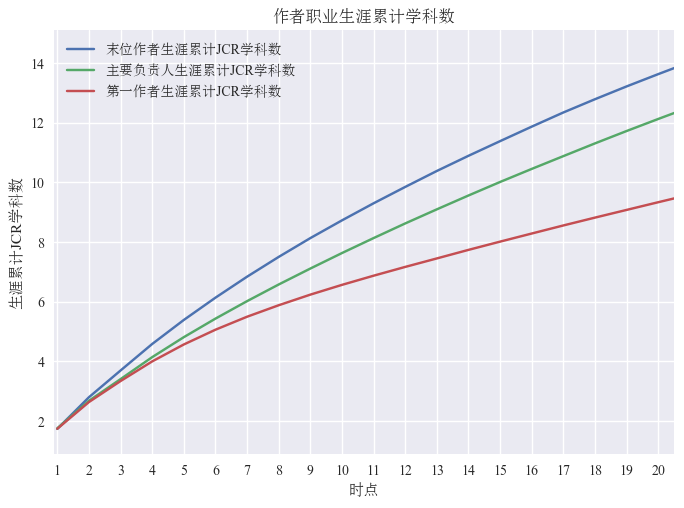

In [9]:
years1 , Key = zip(*sorted(KeyJFieldSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJFieldSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJFieldSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者生涯累计JCR学科数')
ax.plot(years1,np.array(Key), label='主要负责人生涯累计JCR学科数')
ax.plot(years2,np.array(First), label='第一作者生涯累计JCR学科数')
ax.set(xlabel='时点', ylabel='生涯累计JCR学科数',
       title='作者职业生涯累计学科数')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.9, 15.1)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计学科数.png",dpi=300)
plt.show()

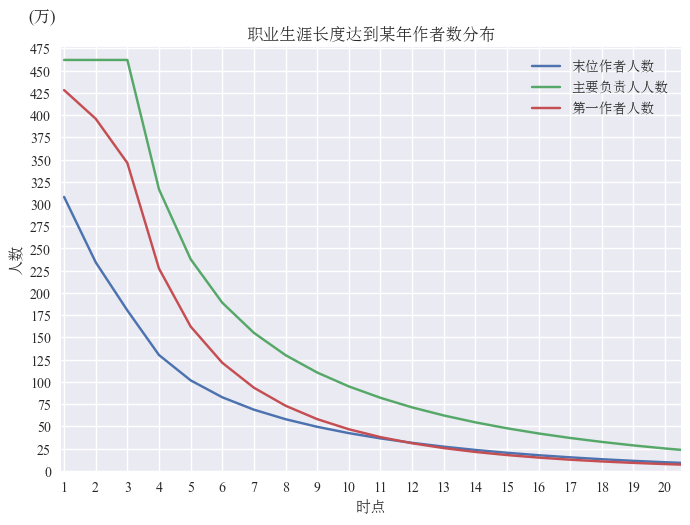

In [66]:
KeyNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNumAuthor.pk', 'rb'))
FirstNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstNumAuthor.pk', 'rb'))
LastNumAuthor = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastNumAuthor.pk', 'rb'))


years1 , Key = zip(*sorted(KeyNumAuthor.items()))
years2 , First = zip(*sorted(FirstNumAuthor.items()))
years3 , Last = zip(*sorted(LastNumAuthor.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last)/10000, label='末位作者人数')
ax.plot(years1,np.array(Key)/10000, label='主要负责人人数')
ax.plot(years2,np.array(First)/10000, label='第一作者人数')
ax.set(xlabel='时点', ylabel='人数',
       title='职业生涯长度达到某年作者数分布')
plt.ticklabel_format(style='plain')

plt.text(-0.03,1.07,'(万)',
horizontalalignment='center',verticalalignment='center',
transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(0.001, 476.1)
ax.set_xticks([i for i in range(1,21,1)])
ax.set_yticks(np.array([i for i in range(0,476,25)]))
ax.legend()
fig.savefig("职业生涯长度达到某年作者数分布.png",dpi=300)
plt.show()

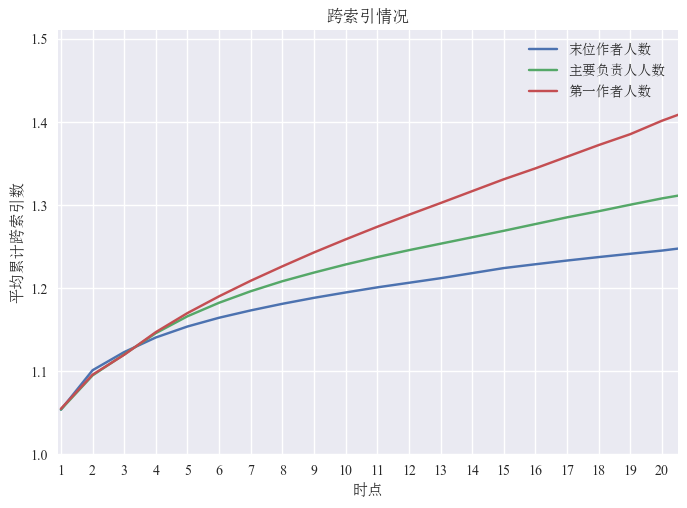

In [75]:
KeyJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJCISeriesAVGdict.pk', 'rb'))
FirstJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJCISeriesAVGdict.pk', 'rb'))
LastJCISeriesAVGdict = pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJCISeriesAVGdict.pk', 'rb'))

years1 , Key = zip(*sorted(KeyJCISeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJCISeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJCISeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者人数')
ax.plot(years1,np.array(Key), label='主要负责人人数')
ax.plot(years2,np.array(First), label='第一作者人数')
ax.set(xlabel='时点', ylabel='平均累计跨索引数',
       title='跨索引情况')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(万)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 20.5)
ax.set_ylim(1, 1.51)
ax.set_xticks([i for i in range(1,21,1)])
# ax.set_yticks(np.array([i for i in range(0,476,25)]))
ax.legend()
fig.savefig("跨索引情况.png",dpi=300)
plt.show()

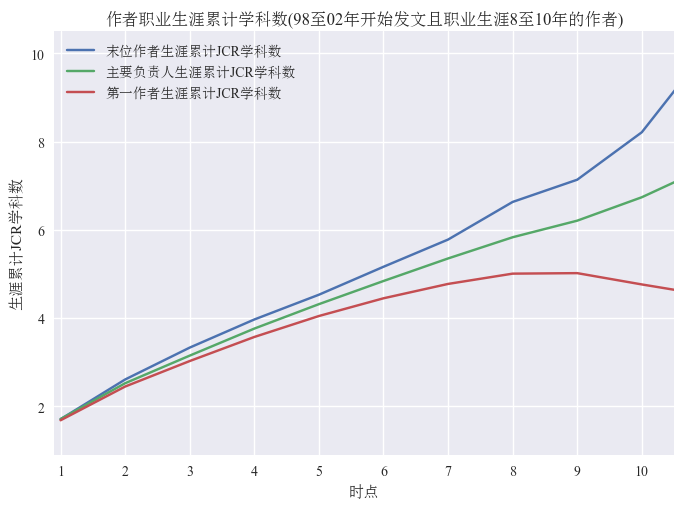

In [11]:
KeyJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyJField98_02_8_10SeriesAVGdict.pk', 'rb'))
FirstJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/FirstJField98_02_8_10SeriesAVGdict.pk', 'rb'))
LastJFieldSeriesAVGdict=pk.load(open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/LastJField98_02_8_10SeriesAVGdict.pk', 'rb'))
years1 , Key = zip(*sorted(KeyJFieldSeriesAVGdict.items()))
years2 , First = zip(*sorted(FirstJFieldSeriesAVGdict.items()))
years3 , Last = zip(*sorted(LastJFieldSeriesAVGdict.items()))

fig, ax = plt.subplots()
ax.plot(years3,np.array(Last), label='末位作者生涯累计JCR学科数')
ax.plot(years1,np.array(Key), label='主要负责人生涯累计JCR学科数')
ax.plot(years2,np.array(First), label='第一作者生涯累计JCR学科数')
ax.set(xlabel='时点', ylabel='生涯累计JCR学科数',
       title='作者职业生涯累计学科数(98至02年开始发文且职业生涯8至10年的作者)')
plt.ticklabel_format(style='plain')

# plt.text(-0.03,1.07,'(篇)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
ax.set_xlim(0.9, 10.5)
ax.set_ylim(0.9, 10.5)
ax.set_xticks([i for i in range(1,11,1)])
# ax.set_yticks(np.array([i for i in range(2,24,2)]))
ax.legend()
fig.savefig("作者职业生涯累计学科数(98至02年开始发文且职业生涯8至10年的作者).png",dpi=300)
plt.show()